# This code will make an image detection model with image segmentation tasks

Install Dependencies

In [ ]:
# Create a new directory for your project
#mkdir yolo_object_detection
#cd yolo_object_detection

# Create a virtual environment (optional but recommended)
#python -m venv yolo_env
#source yolo_env/bin/activate  # On Windows: yolo_env\Scripts\activate

# Install required packages
!pip install torch torchvision torchaudio
!pip install ultralytics  # This includes YOLOv8
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install --upgrade torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00


In [7]:
!pip --upgrade proglearn


Usage:   
  pip3 <command> [options]

no such option: --upgrade


Enable GPU Acceleration

In [ ]:
!nvidia-smi
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU device: {torch.cuda.get_device_name(0)}")

Thu Sep 25 06:57:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dir_path = "/content/drive/MyDrive/ObjectDetection-Tasks"
filepath = os.path.join(dir_path, "Task-for-model-2")
dataset_path = os.path.join(filepath, 'retrainDataset/combinedRetrainData')  # New structured dataset location

labels_source = os.path.join(dataset_path, "labelData") # Change this directory target into the converted directory
images_source = os.path.join(dataset_path,  "imageData") # add this if in another directory , "captured_frames"

# Paths Variable that are being used below
project_path = os.path.join(filepath, 'Yolo8V_segmentation_2')
data_path = os.path.join(dataset_path, 'dataset.yaml')

Load Pre-trained Model

In [9]:
from ultralytics import YOLO

# Load pre-trained segmentation model
#model = YOLO('yolov8m-seg.pt')  # using medium variant

# Load created model
model = YOLO('/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation/run_12/weights/best.pt')

ModuleNotFoundError: No module named 'ultralytics'

Start Training

In [ ]:
results = model.train(
    data=data_path,
    freeze=['backbone'],
    epochs=100,
    imgsz=640,
    batch=16,
    device=0,  # use GPU
    patience=10,
    optimizer='AdamW',
    lr0=0.001,
    cos_lr=True,
    augment=True,
    save=True,
    save_period=10,
    project=project_path,
    name='run_1',
    amp=True,
    nbs=64,
    overlap_mask=True,
    dropout=0.1,
    weight_decay=0.0005
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/retrainDataset/combinedRetrainData/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=['backbone'], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation/run_12/weights/best.pt, momentum=0

For better performance, consider these additional parameters based on your dataset:

In [ ]:
#results = model.train(
    # ... previous parameters ...
    #cos_lr=True,              # Use cosine learning rate scheduler
    #dropout=0.1,              # Regularization for larger models
    #weight_decay=0.0005,      # Weight decay for optimization
    #mixup=0.1,                # Mixup augmentation probability
    #copy_paste=0.3,           # Copy-paste augmentation probability
    #erasing=0.4,              # Random erasing probability
    #mask_ratio=4,             # Mask resolution ratio
    #overlap_mask=True,        # Whether masks should overlap during training
    #nbs=64,                   # Nominal batch size
#)

TensorBoard Integration

In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir=/content/runs/segment/train

Custom Monitoring Script

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,225,279 parameters, 0 gradients, 104.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 129.8±8.9 MB/s, size: 341.7 KB)
val: Scanning /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/retrainDataset/combinedRetrainData/labels/val.cache... 64 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 65/65 119.1Kit/s 0.0s
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 20% ━━────────── 1/5 0.3it/s 0.9s<12.3sWARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 40% ━━━━╸─────── 2/5 0.5it/s 2.0s<5.8sWARNING ⚠️ Model

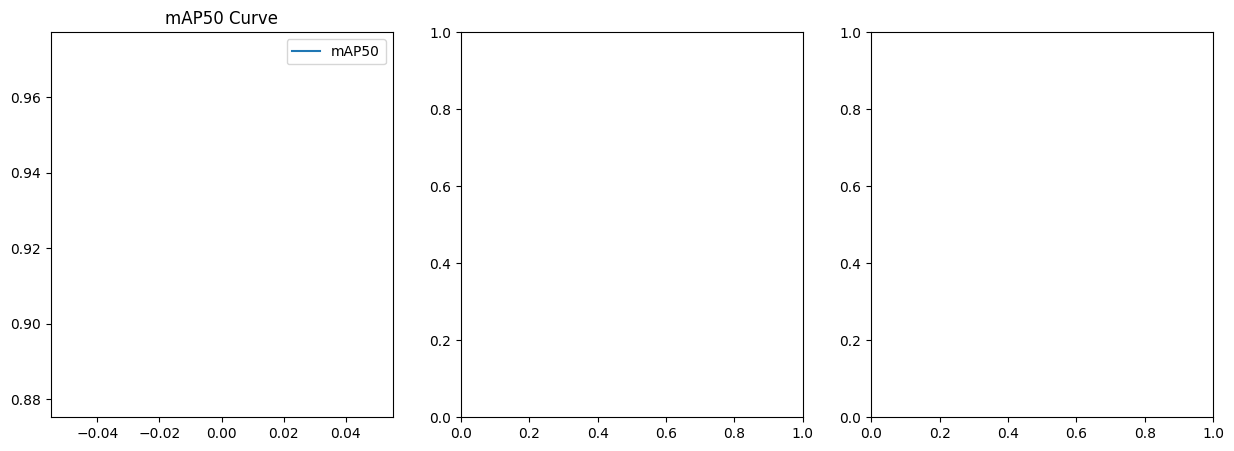

In [ ]:
import matplotlib.pyplot as plt

# Plot training results
results = model.val()
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(results.box.map, label='mAP50')
ax[0].set_title('mAP50 Curve')
ax[0].legend()
#ax[1].plot(results.mask.map, label='Mask mAP50')
#ax[1].set_title('Mask Accuracy')
#ax[1].legend()
#ax[2].plot(results.losses, label='Training Loss')
#ax[2].set_title('Loss Curve')
#ax[2].legend()
plt.show()

Model Validation

In [ ]:
# Validate model performance
metrics = model.val(
    data=data_path,
    split='val',
    conf=0.25,
    iou=0.6,
    device=0
)

print(f"mAP50-95: {metrics.box.map}")
print(f"Mask mAP50-95: {metrics.mask.map}")

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 142.8±16.6 MB/s, size: 342.0 KB)
val: Scanning /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/retrainDataset/combinedRetrainData/labels/val.cache... 64 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 65/65 141.6Kit/s 0.0s
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 20% ━━────────── 1/5 0.3it/s 0.9s<12.1sWARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 40% ━━━━╸─────── 2/5 0.5it/s 1.9s<5.6sWARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
                 

AttributeError: 'SegmentMetrics' object has no attribute 'mask'. See valid attributes below.

    Calculate and aggregate detection and segmentation metrics over a given set of classes.

    Attributes:
        names (dict[int, str]): Dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        seg (Metric): An instance of the Metric class to calculate mask segmentation metrics.
        speed (dict[str, float]): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'segment'.
        stats (dict[str, list]): A dictionary containing lists for true positives, confidence scores, predicted classes, target classes, and target images.
        nt_per_class: Number of targets per class.
        nt_per_image: Number of targets per image.

    Methods:
        process: Process the detection and segmentation metrics over the given set of predictions.
        keys: Return a list of keys for accessing metrics.
        mean_results: Return the mean metrics for bounding box and segmentation results.
        class_result: Return classification results for a specified class index.
        maps: Return mAP scores for object detection and semantic segmentation models.
        fitness: Return the fitness score for both segmentation and bounding box models.
        curves: Return a list of curves for accessing specific metrics curves.
        curves_results: Provide a list of computed performance metrics and statistics.
        summary: Generate a summarized representation of per-class segmentation metrics as a list of dictionaries.
    

Image Segmentation

In [ ]:
results = model.predict(
    source='/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/retrainDataset/combinedRetrainData/images/test/Salinan frame_20250920_114137_130922.jpg',
    conf=0.25,
    iou=0.7,
    show=True,
    save=True,
    save_txt=True,
    save_conf=True
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/1 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/retrainDataset/combinedRetrainData/images/test/Salinan frame_20250920_114137_130922.jpg: 384x640 1 fork, 1 rice, 1 menu, 63.5ms
Speed: 3.9ms preprocess, 63.5ms inference, 29.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_14
1 label saved to /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_14/labels


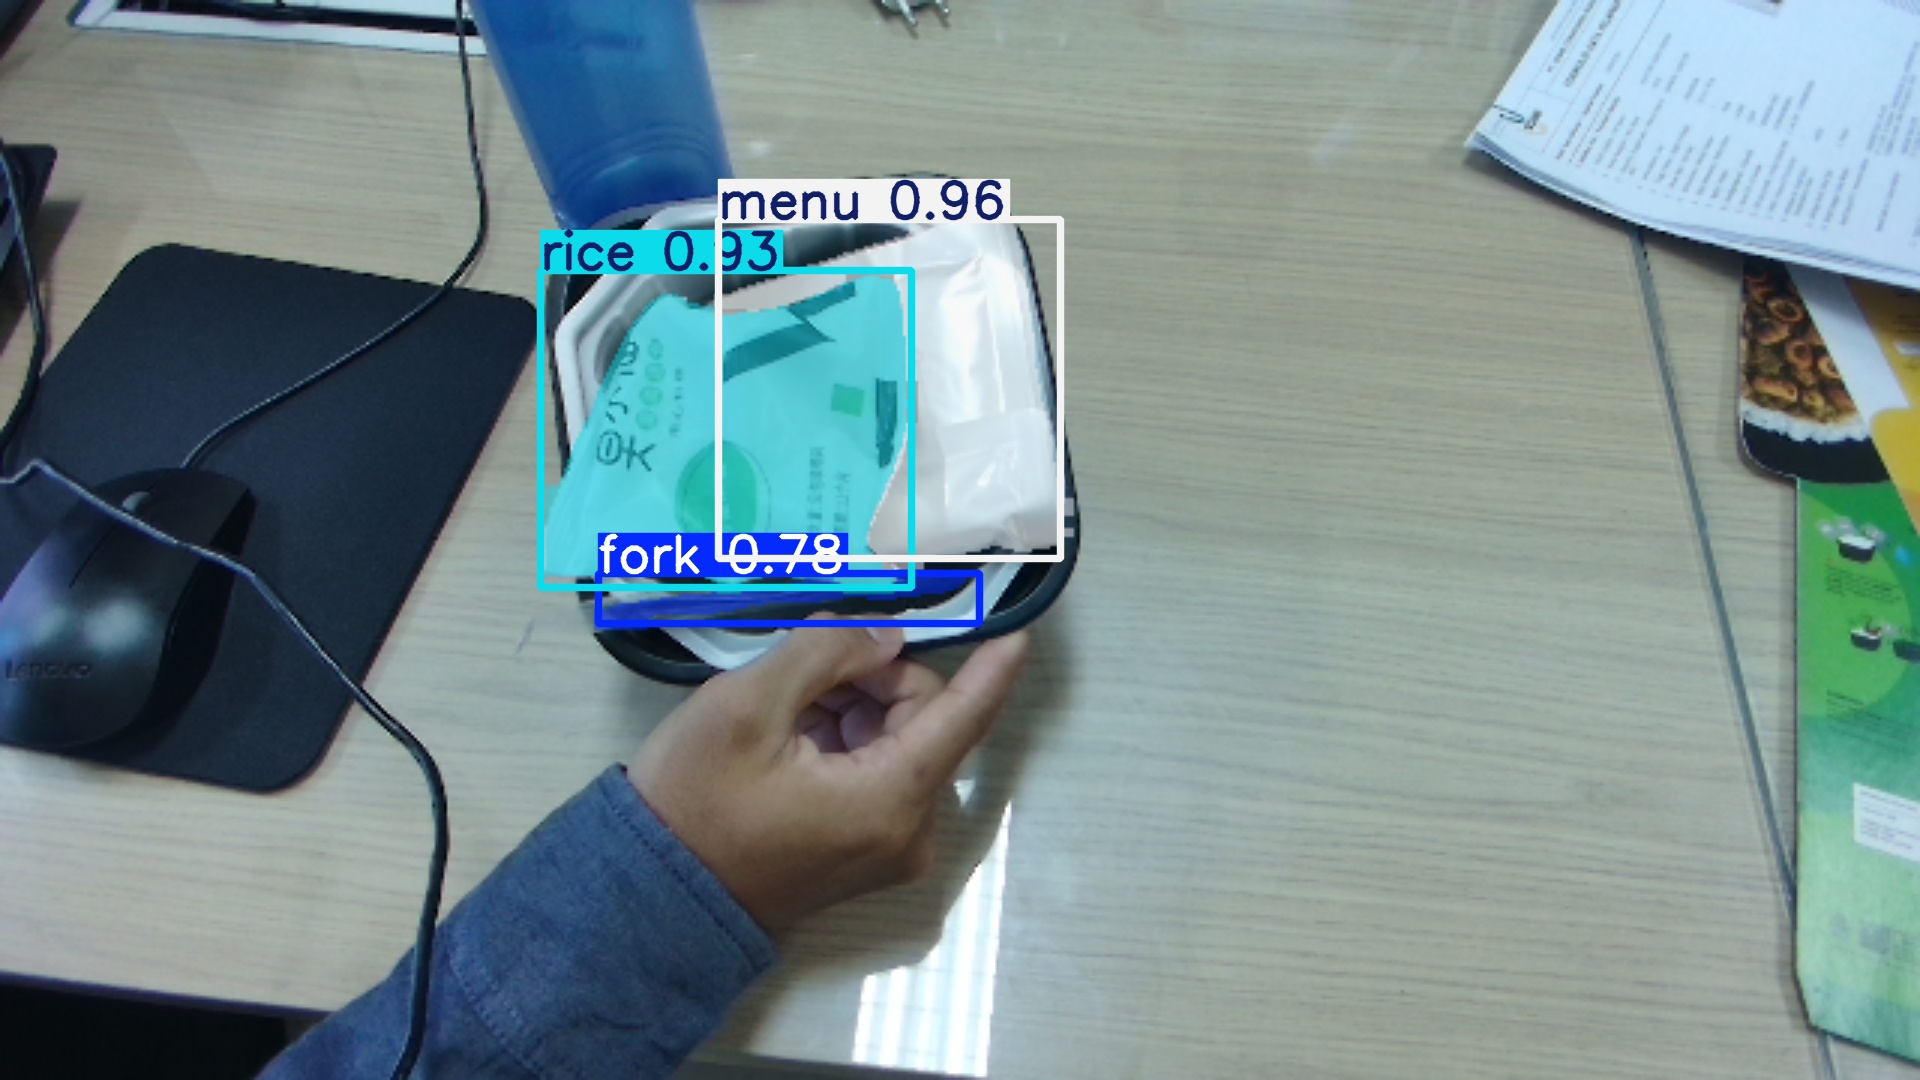

In [ ]:
from IPython.display import Image
Image(filename=f"/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_14/Salinan frame_20250920_114137_130922.jpg", width=1000)

Video Processing

In [ ]:
!yolo task=segment mode=predict \
    model='/content/runs/segment/train/weights/best.pt' \
    source='/content/video.mp4' \
    conf=0.3 \
    save=True

Export for Deployment

In [ ]:
# Export to different formats
#model.export(format='onnx', dynamic=True, simplify=True)
#model.export(format='tensorrt', device=0)
#model.export(format='openvino')
model.export(format='torchscript')

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 41, 8400), (1, 32, 160, 160)) (52.3 MB)

TorchScript: starting export with torch 2.8.0+cu126...
TorchScript: export success ✅ 8.8s, saved as '/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_1/weights/best.torchscript' (104.4 MB)

Export complete (11.3s)
Results saved to /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_1/weights
Predict:         yolo predict task=segment model=/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_1/weights/best.torchscript img

'/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/Yolo8V_segmentation_2/run_1/weights/best.torchscript'

Transfer Learning

In [ ]:
# Freeze backbone layers
model = YOLO('yolov8m-seg.pt')
model.freeze('backbone')  # freeze feature extraction layers

# Train only detection heads
results = model.train(
    data='dataset.yaml',
    epochs=50,
    freeze=['backbone'],
    device=0
)

Hyperparameter Tuning

In [ ]:
from ultralytics import Tuner

tuner = Tuner()
tuner.tune(
    model='yolov8s-seg.pt',
    space={
        'lr0': (0.0001, 0.01),
        'weight_decay': (0.0001, 0.001),
        'dropout': (0.0, 0.2)
    },
    data='dataset.yaml',
    iterations=30,
    device=0
)

Memory Management

In [ ]:
# Use gradient accumulation for larger effective batch sizes
results = model.train(
    batch=8,
    nbs=64,  # nominal batch size
    accumulate=8  # gradient accumulation steps
)

# Use automatic mixed precision
results = model.train(amp=True)